### Bistable wilson and cowan like model

from : https://elifesciences.org/articles/22425#fig5

In [474]:
# for fast array manipulation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for numerical ODE integration
from scipy.integrate import solve_ivp
# for nonlinear equations

# to display plots in-line
%matplotlib inline
plt.style.use('ggplot')

In [475]:
def sigmoid(x, a, thr):
    return 1 / (1 + np.exp(-a * (x - thr)))

def threshold_linear(x,thr,gain):
    thresholded = x-thr
    if thresholded > 0:
        return gain*thresholded
    else:
        return 0 
    
vthreshold_linear = np.vectorize(threshold_linear,otypes=[np.float64])

In [476]:
# Time constant of neural pop in seconds
tau_e = 0.010
tau_i = 0.002
tau_a = 0.5
# Synapse strength
j_ee = 5
j_ei = 2
j_ie = 10
j_ii = 0.5
# Adaptation parameter
beta = 6
tau_a = 0.5
# threshold and gains
g_e = 1
g_i = 4
thr_i = 25
thr_e = 3 # to play with
# Input currents
I_e = 6
I_i = 12
# I_e-thr_e = 3 which is equivalent to taking I_e = 0 and thr_e = -3 as in the paper

#Inhibitory plasticity
inh_pot = 0.2
inh_decay = 0.02
# inh_pot = 0
# inh_decay = 0
# ei_homeo = 0.03

In [477]:
# this function returns the right hand side of the Wilson-Cowan equation
# (both, in a 2-vector)
#def rate_model(y, t):
def rate_model(t, y):
    E = y[0]
    I = y[1]
    A = y[2]
    E2 = y[3]
    A2 = y[4]
    I2 = y[5]
    Je1i1 = y[6]
    Je2i1 = y[7]
    Je1i2 = y[8]
    Je2i2 = y[9]
    # Ji1e1 = y[10]
    # Ji2e2 = y[11]

    y1 = (-E + vthreshold_linear(j_ee*E-Je1i1*I-Je2i1*I2-A+I_e,thr_e, g_e))/tau_e
    y2 = (-I + vthreshold_linear(j_ie*E-j_ii*I+I_i,thr_i,g_i))/tau_i
    y3 = (-A + beta*E)/tau_a
    y4 = (-E2 + vthreshold_linear(j_ee*E2-Je1i2*I-Je2i2*I2-A2+I_e,thr_e, g_e))/tau_e
    y5 = (-A2 + beta*E2)/tau_a
    y6 = (-I2 + vthreshold_linear(j_ie*E2-j_ii*I2+I_i,thr_i,g_i))/tau_i
    # y7 = ((E*I)*inh_pot - inh_decay*Je1i1)*1
    # y8 = ((E2*I)*inh_pot - inh_decay*Je2i1)*1
    # y9 = ((E*I2)*inh_pot - inh_decay*Je1i2)*1
    # y10 = ((E2*I2)*inh_pot - inh_decay*Je2i2)*1
    y7 = ((E*I)*inh_pot - inh_decay)*1
    y8 = ((E2*I)*inh_pot - inh_decay)*1
    y9 = ((E*I2)*inh_pot - inh_decay)*1
    y10 = ((E2*I2)*inh_pot - inh_decay)*1
    # y11 = ((7.5-I)*E)*ei_homeo
    # y12 = ((7.5-I)*E2)*ei_homeo
    if Je1i1<0:
        y7 = -Je1i1
    if Je2i1<0:
        y8 = -Je2i1
    if Je1i2<0:
        y9 = -Je1i2
    if Je2i2<0:
        y10 = -Je2i2

    return [y1, y2, y3, y4, y5, y6,y7, y8, y9, y10]


In [478]:
# simulation duration and step size
# time = np.linspace(0, 100, 10000)

# starting point, hopefully inside the basin of attraction of our attractor
#E0, I0, A0, E10, A10, I10, Je1i10, Je2i10, Je1i20, Je2i20, Ji1e10, Ji2e10 = 0, 0, 0, 0, 0, 0, j_ei, j_ei, j_ei, j_ei, j_ie, j_ie # try changing this
E0, I0, A0, E10, A10, I10, Je1i10, Je2i10, Je1i20, Je2i20 = 0, 0, 0, 0, 0, 0, j_ei, j_ei, j_ei, j_ei # try changing this


# find the solution with scint.odeint
#odesol = solve_ivp(rate_model, [0,500], [E0, I0, A0, E10, A10, I10,Je1i10, Je2i10, Je1i20, Je2i20, Ji1e10, Ji2e10],'BDF')
odesol = solve_ivp(rate_model, [0,600], [E0, I0, A0, E10, A10, I10,Je1i10, Je2i10, Je1i20, Je2i20],'BDF')



In [479]:
#exc_timeseries, inh_timeseries, a_timeseries, exc1_timeseries, a1_timeseries, inh1_timeseries, Je1i1_ts, Je2i1_ts, Je1i2_ts, Je2i2_ts, Ji1e1_ts, Ji2e2_ts = odesol.y
exc_timeseries, inh_timeseries, a_timeseries, exc1_timeseries, a1_timeseries, inh1_timeseries, Je1i1_ts, Je2i1_ts, Je1i2_ts, Je2i2_ts = odesol.y

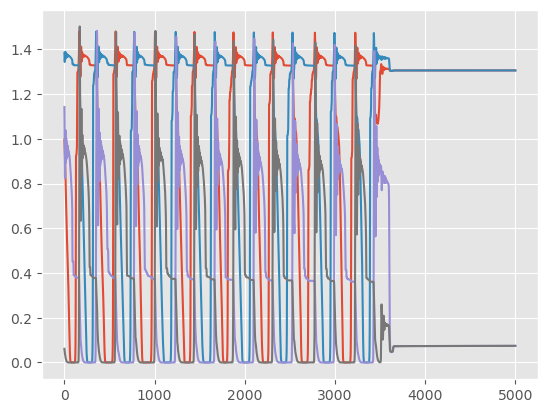

In [480]:
plt.plot(exc_timeseries[-5000:]);
plt.plot(exc1_timeseries[-5000:]);
plt.plot(inh1_timeseries[-5000:]);
plt.plot(inh_timeseries[-5000:]);

In [481]:
Je1i1_ts[-10]

5.2342181197007305

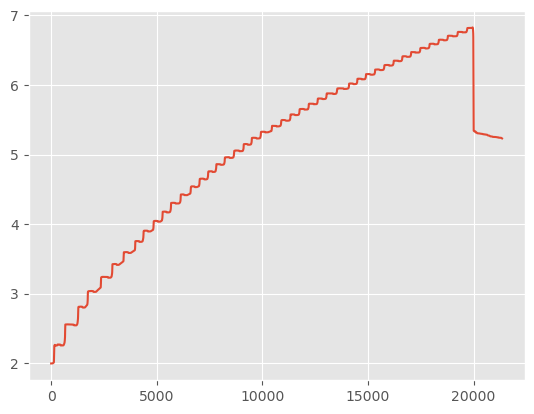

In [484]:
plt.plot(Je1i1_ts);

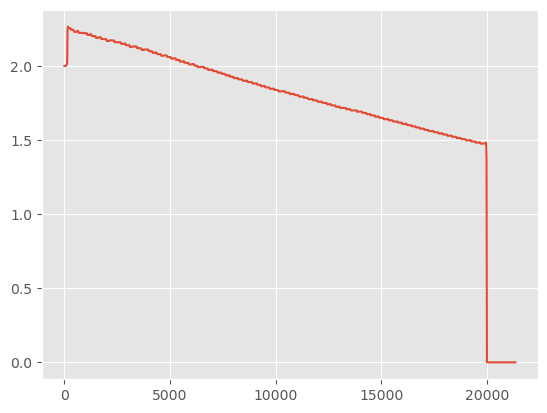

In [485]:
plt.plot(Je2i1_ts);